Compute extreme precipitation indices <br>
https://www.guillaumedueymes.com/post/extreme_precipitation/  <br>

a set of eight frequency and intensity precipitation indices:
 - PrecTOT: Total cumulated precipitation
 
 - MOY: Mean precipitation value 
 
 - Prcp1: No of wet days (precipitation ≥ 1 mm) [%]
 
 - SDII: The mean precipitation intensity is defined simply by the amount of total precipitation falling in a wet day (using the threshold ≥ 1 mm/day to define a wet day).  

 - CDD: The maximum number of consecutive dry days is used to characterize the length of dry spells.

 - CWD: The maximum number of consecutive wet days is used to characterize the length of wet spells.

 - R3D:The greatest three days total rainfall describes extremes in precipitation amount.

 - Prec90p: For a very wet day, the 90th percentile value is obtained from all non-zero total precipitation events (i.e. ≥ 1 mm/day).
 
  - Prcp_n: No of (heavy rain) days precipitation ≥ prec (25 mm) (added)
  
  - R20mm: Number of very heavy precipitation days (Precip >= 20mm)
  
  - R9P:Days with RR > 9?th percentile of daily amounts (very wet days)
  
  - R90p:  Days with RR > 90th percentile of daily amounts (very wet days)
  
  - TN90p: number of days when Tmin > 90th percentile

  - TX90p: number of days when Tmax > 90th percentile

  - TN10p: number of days when Tmin < 10th percentile

  - TX10p: number of days when Tmax < 10th percentile

  - SU: Number of summer days (Tmax > 25 - > 30)
  
  - TR: Number of Tropical Nights (Tmin >20C ->10)
  
  - FD: Number of Frost days (Tmin < 0 C)
  
  - ID: Number of sharp ice days (Tmax < 0)
  
  - CSU: Maximum number of consecutive summer days (Tmax > 25C -> 30C)
  
  - CFD: Maximum number of consecutive frost days (Tmin< 0)
  
  - CD: Days with TG < 25th percentile of daily mean temperature and RR <25th percentile of daily precipitation sum

 - CW:Days with TG < 25th percentile of daily mean temperature and RR >75th percentile of daily precipitation sum

 - WD: Days with TG > 75th percentile of daily mean temperature and RR <25th percentile of daily precipitation sum

- WW: Days with TG > 75th percentile of daily mean temperature and RR >75th percentile of daily precipitation sum

  
 we use timeseries daily precipitation data from PRISM

https://www.ncdc.noaa.gov/extremes/cei/
 Climate Extremes Index (CEI)

 - The sum of (a) percentage of the United States with maximum temperatures much below normal and (b) percentage of the United States with maximum temperatures much above normal.
 - The sum of (a) percentage of the United States with minimum temperatures much below normal and (b) percentage of the United States with minimum temperatures much above normal.
 - The sum of (a) percentage of the United States in severe drought (equivalent ot the lowest tenth percentile) based on the PDSI and (b) percentage of the United States with severe moisture surplus (equivalent to the highest tenth percentile) based on the PDSI.
 - Twice the value of the percentage of the United States with a much greater than normal proportion of precipitation derived from extreme (equivalent to the highest tenth percentile) 1-day precipitation events.
 - The sum of (a) percentage of the United States with a much greater than normal number of days with precipitation and (b) percentage of the United States with a much greater than normal number of days without precipitation.

https://github.com/monocongo/climate_indices
Climate Indeices in Python

The following indices are provided:

 - SPI, Standardized Precipitation Index, utilizing both gamma and Pearson Type III distributions
 - SPEI, Standardized Precipitation Evapotranspiration Index, utilizing both gamma and Pearson Type III distributions
 - PET, Potential Evapotranspiration, utilizing either Thornthwaite or Hargreaves equations
 - PDSI, Palmer Drought Severity Index
 - scPDSI, Self-calibrated Palmer Drought Severity Index
 - PHDI, Palmer Hydrological Drought Index
 - Z-Index, Palmer moisture anomaly index (Z-index)
 - PMDI, Palmer Modified Drought Index
 - PNP, Percentage of Normal Precipitation


https://github.com/cerfacs-globc/icclim
icclim library 
icclim is a Python library to compute climate indices. icclim name stands for index, calculation, climate.

scatter plot of the anomalies of temperature and precipitation 
https://gitlab.com/is-enes-cdi-c4i/notebooks/-/blob/master/C4I_deltaT_deltaP_Anomaly_2081-2100_vs_1971-2000.ipynb

https://gitlab.com/is-enes-cdi-c4i/notebooks/-/blob/master/C4I_Summer_days._Calculate__subset_and_plot.ipynb
ICCLIM C4I: Calculate the number of Summer Days



casper_2020

In [1]:
import pandas as pd
import os
from datetime import date
import calendar
import numpy as np
from dateutil.relativedelta import relativedelta
import warnings
import matplotlib.pylab as plt
import datetime
import seaborn as sns
import icclim
import climextremes  
warnings.filterwarnings("ignore") 

# when functions are put in a common module, it is easier to load an apply funcions
import Indices_Precipitation

In [2]:
def rd_csv(var_s):
    dir_i = '/glade/campaign/mmm/c3we/INNOVATOR/'
    flnm = dir_i + var_s + "_1981-2021.csv"
    print('read in ', flnm)

    df = pd.read_csv(flnm)

    # NOTE: df['date']  dtype='object'  it has to be changed to datetime64
    # Time series object must have a datetime-like index in order to use Convenince method
    df['datetime'] = pd.to_datetime(df.date)
    df.index = df['datetime']

    df = df.drop(columns = ["date", 'datetime'])
    return df

# compute quantile of precipitatin >1mm/day
def quantile_prec(df, p_q):
    '''
    df: dataFrame
    p_q: quantile 0-1
    '''
    # calculate quantiles
    df_data = df.iloc[:,2:7]
    # only >1mm/day prec. count
    df_data = df_data[df_data>=1]
    prec_p = df_data.quantile(p_q)
    return prec_p

def plot_trend(df, ax):
    '''
    add a average trend line to dataframe plot
    '''
    z = np.polyfit(df.index, df.mean(axis=1), 1)
    p = np.poly1d(z)
    ax.yaxis.set_ticks_position('both')
    ax.plot(df.index, p(df.index))

def create_2d(n_county):
    annual = [] 
    for i in np.arange(n_county):
        annual.append([])       
    return annual

def ind_2_indice(ind):
    if ind == 'PrecTOT':
        indice = Indices_Precipitation.PrecTOT  
        indice_out = 'PrecTOT'     
    elif ind == 'SDII':
        indice = Indices_Precipitation.SDII
        indice_out = 'SDII'
    elif ind == 'Prcp1':
        indice = Indices_Precipitation.Prcp1
        indice_out = 'Prcp1'
    elif ind == 'CWD':
        indice = Indices_Precipitation.CWD
        indice_out = 'CWD'
    elif ind == 'MOY':
        indice = Indices_Precipitation.MOY
        indice_out = 'MOY'
    elif ind == 'CDD':
        indice = Indices_Precipitation.CDD
        indice_out = 'CDD'   
    elif ind == 'Prec90p':
        indice = Indices_Precipitation.Prec90p
        indice_out = 'Prec90p'
    elif ind == 'R3d':
        indice = Indices_Precipitation.R3d
        indice_out = 'R3d'
    elif ind == 'R20mm' or ind == 'R90p' or ind == 'TX90p' or ind == 'TX10p' \
        or ind == 'TN90p' or ind == 'TN10p' or ind == 'SU' or ind == 'TR' \
        or ind == 'FD' or ind == 'ID':
        indice = compute_threshold_frequency
        indice_out = 'number of days with threshold '    
    elif ind == 'R9p':
        indice = R9p
        indice_out = 'R9p'  
    elif ind == 'CSU' or ind == 'CFD':
        indice = compute_threshold_cd
        indice_out = 'maximum number of consecutive days'
    elif ind == 'CD':
        indice = cd_tg_prec
        indice_out = 'Days with TG < 25th percentil and RR <25th percentile '
    elif ind == 'CW':
        indice = cw_tg_prec
        indice_out = 'Days with TG < 25th percentil and RR >75th percentile '
    elif ind == 'WD':
        indice = wd_tg_prec
        indice_out = 'Days with TG > 75th percentil and RR <25th percentile '
    elif ind == 'WW':
        indice = ww_tg_prec
        indice_out = 'Days with TG > 75th percentil and RR >75th percentile '    
    return indice, indice_out

# calculate and plot seasonal extreme indices
def SEASON_IND(year_s, year_e, ind_s):
    ''' 
    ind_s: indice. like 'PrecTOT', 'CDD', 'Prec90p' ....
    '''
    djf = []
    mam = []
    son = []
    jja = []
    incr = date(year_s, 1, 1)
    end  = date(year_e-1, 12, 31)
 
    while incr <= end:
        current_year = str(incr.year)
        last_year = str(incr.year-1)
        try:
            dec = preacc[last_year][np.in1d(preacc[last_year].index.month, [12])]
        except:
            rng_p1 = pd.date_range(end=current_year, periods = 32, freq ='D')
            rng = rng_p1[:len(rng_p1)-1]
            #rng = pd.date_range(last_year, periods=31, freq='D')
            #dec = pd.DataFrame({'datetime': rng, 'variable': [np.nan]*31}, columns = ['datetime','variable']) 
            
            dec = pd.DataFrame( {'Pr': [np.nan]*31}, columns = ['Pr']) 
            dec.index = rng
        
        j_f = preacc[current_year][np.in1d(preacc[current_year].index.month, [1,2])]
        
        djf.append(ind_s(dec.append(j_f).Pr))            
        mam.append(ind_s((preacc[current_year][np.in1d(preacc[current_year].index.month, [3,4,5])]).Pr))
        jja.append(ind_s((preacc[current_year][np.in1d(preacc[current_year].index.month, [6,4,8])]).Pr))
        son.append(ind_s((preacc[current_year][np.in1d(preacc[current_year].index.month, [9,10,11])]).Pr))            
    
        incr = incr + relativedelta(years=1)
        
    TIME=[]
    for y in range(year_s, year_e,1):
        TIME.append(y)
        
    df_season = pd.DataFrame({'Date': TIME, 'Indice DJF': djf, 'Indice MAM':mam, 'Indice JJA':jja, 'Indice SON':son}, 
                         columns = ['Date','Indice DJF', 'Indice MAM', 'Indice JJA', 'Indice SON']) 

    df_season.set_index("Date", inplace = True)
    
    # get current axis the same as ax = plt.gca()
    ax = plt.axes()
    df_season[["Indice DJF", "Indice MAM", "Indice JJA", "Indice SON"]].plot(kind="bar", stacked=True, ax=ax)
    # use the __name__ property to get the function name
    name_func = ind_s.__name__
    ax.set_title(name_func)
   
    ax.set_xlabel('Time')
    
    if name_func == 'PrecTOT' or name_func == 'MOY' or name_func == 'Prec90p' or name_func == 'SDII' or name_func == 'R3d':
        ax.set_ylabel('mm', fontsize=15, color='black', weight='semibold')
    elif name_func == 'CDD' or name_func == 'CWD':
        ax.set_ylabel('day', fontsize=15, color='black', weight='semibold')
    elif name_func == 'Prcp1':
        ax.set_ylabel('%', fontsize=15, color='black', weight='semibold')
        
    figure = ax.get_figure()    
    figure.set_size_inches(12, 8) 
    
    plt.show()
    

# compute  ≥ threshold frequency
def compute_threshold_frequency(da, threshold, is_greater):
    '''
    da: 1D data 
    threshold
    is_greater: True,  greater than threshold
                False, less than threshold
    '''
    import numpy as np
    ind_freq=[]
    da_no_nan = da[~np.isnan(da)]
    N = len(da)
    N2 = len(da_no_nan)
   
    if (N2 == 0):
         N2=1
         
    if ((N2/N) < 0.8): 
         ind_freq = np.empty(1)
         ind_freq = np.nan
    else:
         ind_freq = 0
         for row in da_no_nan:
            if is_greater == 'True':
                if row >= threshold :
                    ind_freq += 1 
            else:
                if row < threshold :
                    ind_freq += 1
         #ind_freq = 100 * (ind_freq/N2)
         
    return ind_freq     

# comput consecutive days of exceeding threshold
def compute_threshold_cd(S, threshold, is_greater):
     '''
    S: 1D data 
    threshold
    is_greater: True,  greater than threshold
                False, less than threshold
     '''
     import numpy as np
     ind_CD=[]
     S_no_nan = S[~np.isnan(S)]
     N = len(S)
     N2 = len(S_no_nan)
     if ((N2/N) < 0.8): 
         ind_CD = np.empty(1)
         ind_CD = np.nan
     else:
         temp = 0
         ind_CD = 0 
         j =0
         while (j < N2):
            if is_greater == 'True':
                while (j < N2 ) and (S_no_nan[j] >= threshold ):
                    j += 1
                    temp +=1
            else: 
                while (j < N2 ) and (S_no_nan[j] < threshold ):
                    j += 1
                    temp +=1
                    
            if ind_CD < temp:
                 ind_CD = temp
            temp = 0
            j += 1 
     return ind_CD   

# compute days with TG < 25th percentile of daily mean temperature and RR <25th percentile of daily precipitation sum
def cd_tg_prec(prec, tg, t25_prec, t25_tg):
    '''
    tg: 1D temperature
    prec: 1d Precipitation
    t_tg: temperagure of 25 or 75 percentile percentile
    t_prec: precipitation of 25 or 75 percentile
    '''
    import numpy as np
    ind_CD=[]   
    N2 = len(tg)
    
    temp = 0
    ind_CD = 0 
    j = 0
    while (j < N2):
         while (j < N2) and (tg[j] < t25_tg) and (prec[j] < t25_prec):
            j += 1
            temp += 1
                    
         if ind_CD < temp:
            ind_CD = temp
        
         temp = 0
         j += 1 
        
    return ind_CD
    
# compute days with TG <25th percentile of daily mean temperature and RR >75th percentile of daily precipitation sum
def cw_tg_prec(prec, tg, t75_prec, t25_tg):
    '''
    tg: 1D temperature
    prec: 1d Precipitation
    t_tg: temperagure of 25 or 75 percentile percentile
    t_prec: precipitation of 25 or 75 percentil
    '''
    import numpy as np
    ind_CD=[]   
    N2 = len(tg)
    
    temp = 0
    ind_CD = 0 
    j = 0
    while (j < N2):
         while (j < N2) and (tg[j] < t25_tg) and (prec[j] > t75_prec):
            j += 1
            temp += 1
                    
         if ind_CD < temp:
            ind_CD = temp
        
         temp = 0
         j += 1 
        
    return ind_CD

# compute days with TG >75th percentile of daily mean temperature and RR <25th percentile of daily precipitation sum
def wd_tg_prec(prec, tg, t25_prec, t75_tg):
    '''
    tg: 1D temperature
    prec: 1d Precipitation
    t_tg: temperagure of 25 or 75 percentile percentile
    t_prec: precipitation of 25 or 75 percentil
    '''
    import numpy as np
    ind_CD=[]   
    N2 = len(tg)
    
    temp = 0
    ind_CD = 0 
    j = 0
    while (j < N2):
         while (j < N2) and (tg[j] > t75_tg) and (prec[j] < t25_prec):
            j += 1
            temp += 1
                    
         if ind_CD < temp:
            ind_CD = temp
        
         temp = 0
         j += 1 
        
    return ind_CD

# compute days with TG >75th percentile of daily mean temperature and RR <25th percentile of daily precipitation sum
def ww_tg_prec(prec, tg, t75_prec, t75_tg):
    '''
    tg: 1D temperature
    prec: 1d Precipitation
    t_tg: temperagure of 25 or 75 percentile percentile
    t_prec: precipitation of 25 or 75 percentil
    '''
    import numpy as np
    ind_CD=[]   
    N2 = len(tg)
    
    temp = 0
    ind_CD = 0 
    j = 0
    while (j < N2):
         while (j < N2) and (tg[j] > t75_tg) and (prec[j] > t75_prec):
            j += 1
            temp += 1
                    
         if ind_CD < temp:
            ind_CD = temp
        
         temp = 0
         j += 1 
        
    return ind_CD

def plot_comp_ind(df_prec, df_tg, t_prec, t_tg, ind_s):
    '''
    df_tg: temperature dataFrame
    df_prec: Precipitation dataFrame
    t_tg: temperagure threshold
    t_prec: precipitation threshold
    '''
    list_county = ['Clackamas','Columbia', 'Multmomah', 'Washington','Yamhill']
    n_county = len(list_county)
    indice, indice_out = ind_2_indice(ind_s)
    annual = create_2d(n_county)

    df_annual = []
    incr= date(year_s, 1, 1)
    end = date(year_e, 12, 31)

    while incr <= end:
        current_year = str(incr.year)
        for nc in np.arange(n_county):
            annual[nc].append(indice(df_prec.iloc[:,nc+2][current_year].values, \
                                     df_tg.iloc[:,nc+2][current_year].values, \
                                     t_prec[nc], t_tg[nc] ))                    
                      
        incr = incr + relativedelta(years=1)
 
    fig, ax = plt.subplots(1,1, figsize=(10,5))
     
    df_annual = pd.DataFrame(np.transpose(np.float_(annual)), columns = list_county)
    df_annual.index = TIME

    ax.set_ylabel('day') #, fontsize=10, color='black', weight='semibold')
     
    df_annual.plot(title=indice_out, ax=ax)
    
    plot_trend(df_annual, ax);
    
def plot_threshold(df, ind_s, t_value, is_greater):
    '''
    df: dataFrame
    ind_s: indice. like 'PrecTOT', 'CDD', 'Prec90p' ....
    t_value: threshold
    is_greater: True,  greater than threshold
                False, less than threshold
    '''
    list_county = ['Clackamas','Columbia', 'Multmomah', 'Washington','Yamhill']
    n_county = len(list_county)
    indice, indice_out = ind_2_indice(ind_s)
    annual = create_2d(n_county)

    df_annual = []
    incr= date(year_s, 1, 1)
    end = date(year_e, 12, 31)

    while incr <= end:
        current_year = str(incr.year)
        for nc in np.arange(n_county):
            annual[nc].append(indice(df.iloc[:,nc+2][current_year].values, t_value, is_greater))                    
                      
        incr = incr + relativedelta(years=1)
 
    fig, ax = plt.subplots(1,1, figsize=(10,5))
     
    df_annual = pd.DataFrame(np.transpose(np.float_(annual)), columns = list_county)
    df_annual.index = TIME

    ax.set_ylabel('day' ) #, fontsize=10, color='black', weight='semibold')
     
    df_annual.plot(title=indice_out + str(t_value), ax=ax)
    
    plot_trend(df_annual, ax);

def plot_hist(df, ind_s, t_value, is_greater):
    '''
    df: dataFrame
    ind_s: indice. like 'PrecTOT', 'CDD', 'Prec90p' ....
    t_value: threshold
    is_greater: True,  greater than threshold
                False, less than threshold
    '''
    list_county = ['Clackamas','Columbia', 'Multmomah', 'Washington','Yamhill']
    n_county = len(list_county)
    indice, indice_out = ind_2_indice(ind_s)
    annual = create_2d(n_county)
   
    if type(t_value)== int or type(t_value)== float :
        n_value = 1
    else:
        n_value = len(t_value)
    
    df_annual = []
    incr= date(year_s, 1, 1)
    end = date(year_e, 12, 31)
                  
    while incr <= end:
        current_year = str(incr.year)
        for nc in np.arange(n_county):
            if n_value >1:
                annual[nc].append(indice(df.iloc[:,nc+2][current_year].values, t_value[nc], is_greater))                    
            else:
                annual[nc].append(indice(df.iloc[:,nc+2][current_year].values, t_value, is_greater))
            
        incr = incr + relativedelta(years=1)
 
    fig, ax = plt.subplots(1, n_county, figsize=(20,5))
     
    df_annual = pd.DataFrame(np.transpose(np.float_(annual)), columns = list_county)
    df_annual.index = TIME
     
    for nc in np.arange(n_county):
        #ax[nc].set_xlabel('annual frequency', fontsize=15, color='black', weight='semibold')
        df_annual.hist(column=list_county[nc], bins=9, ax=ax[nc])

## histogram plot of CD, CW, WD, WW
def plot_hist_cd(df_p, df_t, ind_s, t_p, t_t):
    '''
    df_p: dataFrame of precipitation
    df_t: dataFrame of temperature
    ind_s: indice ('CD', 'CW', "WD", or 'WW')
    t_p: threshold of precipitation
    t_t: threshold of temperature
    '''
    list_county = ['Clackamas','Columbia', 'Multmomah', 'Washington','Yamhill']
    n_county = len(list_county)
    indice, indice_out = ind_2_indice(ind_s)
    annual = create_2d(n_county)
    
    df_annual = []
    incr= date(year_s, 1, 1)
    end = date(year_e, 12, 31)
                  
    while incr <= end:
        current_year = str(incr.year)
        for nc in np.arange(n_county):
            annual[nc].append(indice(df_p.iloc[:,nc+2][current_year].values, \
                                     df_t.iloc[:,nc+2][current_year].values,\
                                     t_p[nc], t_t[nc]))
            
        incr = incr + relativedelta(years=1)
 
    fig, ax = plt.subplots(1, n_county, figsize=(20,5))
     
    df_annual = pd.DataFrame(np.transpose(np.float_(annual)), columns = list_county)
    df_annual.index = TIME
     
    for nc in np.arange(n_county):
        #ax[nc].set_xlabel('annual frequency', fontsize=15, color='black', weight='semibold')
        df_annual.hist(column=list_county[nc], bins=9, ax=ax[nc])
    

In [3]:
year_s = 1981
year_e = 2021

TIME=[]
for y in range(year_s, year_e+1,1):
    TIME.append(y) 
    
list_county = ['Clackamas','Columbia', 'Multmomah', 'Washington','Yamhill']
n_county = len(list_county)

df_prec = rd_csv('PR')

prec_p10 = quantile_prec(df_prec, 0.9)
prec_p90 = quantile_prec(df_prec, 0.9)
 
name_col = df_prec.columns
print(name_col)

df_prec.head()

read in  /glade/campaign/mmm/c3we/INNOVATOR/PR_1981-2021.csv
Index(['year', 'season', 'Clackamas', 'Columbia', 'Multmomah', 'Washington',
       'Yamhill'],
      dtype='object')


,year,season,Clackamas,Columbia,Multmomah,Washington,Yamhill
datetime,,,,,,,
1981-01-01,1981,DJF,0.329228,0.458430,0.000000,1.639850,0.139483
1981-01-02,1981,DJF,0.110309,0.196446,0.194810,0.343985,0.002672
1981-01-03,1981,DJF,0.000679,0.000000,0.000000,0.000000,0.007845
1981-01-04,1981,DJF,0.073056,0.000000,0.000000,0.010075,0.060862
1981-01-05,1981,DJF,0.000000,0.000413,0.014304,0.000000,0.000000


### Annual extreme precipitation indices of 
Clackamas, Columbia, Multmomah, Washington, Yamhill county
trend line is the average of those counties

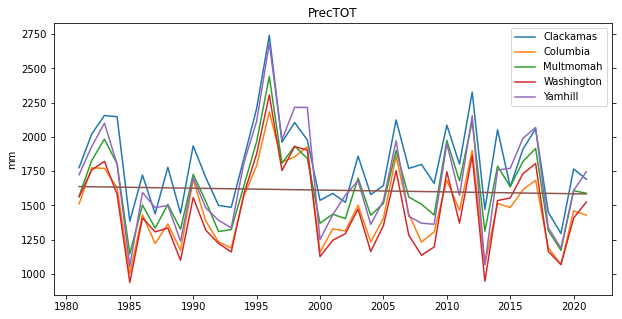

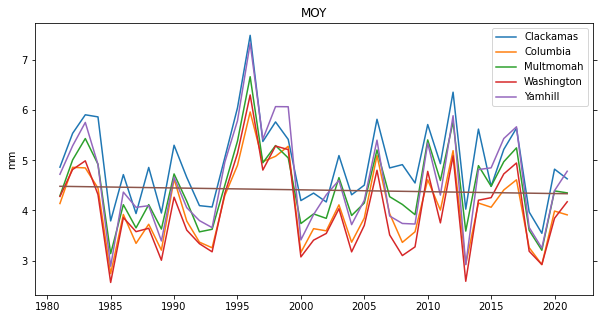

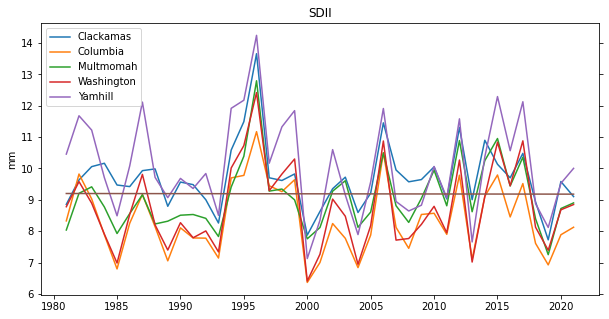

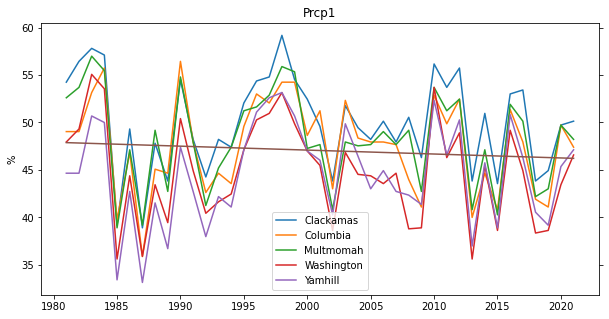

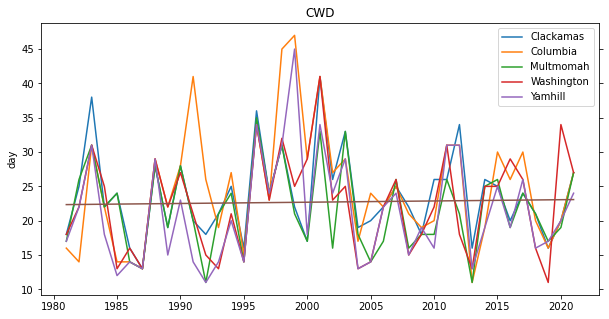

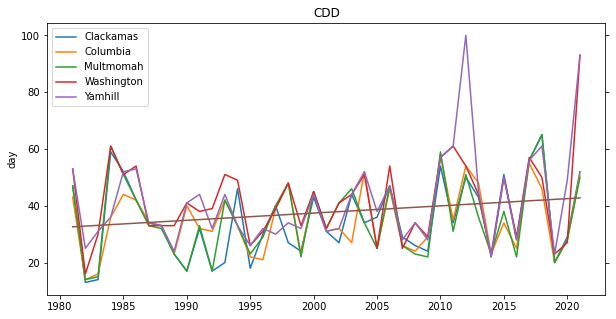

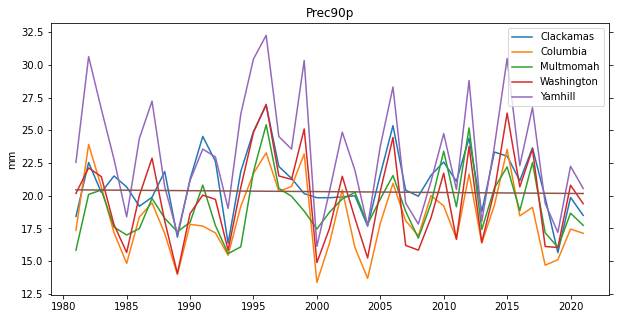

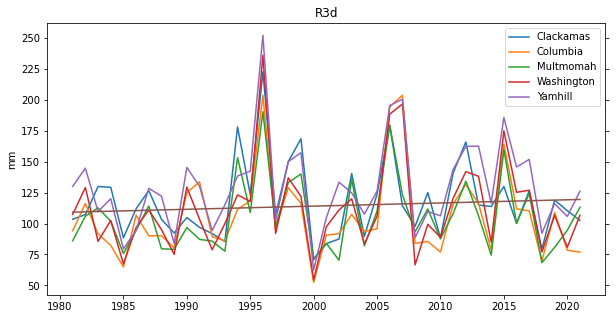

In [4]:
list_indices = ['PrecTOT','MOY','SDII' ,'Prcp1','CWD','CDD','Prec90p','R3d'] 
   
for ind in list_indices:
    indice, indice_out = ind_2_indice(ind)
    
    annual = create_2d(n_county)

    df_annual = []
    incr= date(year_s, 1, 1)
    end = date(year_e, 12, 31)
    while incr <= end:
        current_year = str(incr.year)
        for nc in np.arange(n_county):
            annual[nc].append(indice(df_prec.iloc[:,nc+2][current_year].values))                    
                  
        incr = incr + relativedelta(years=1)
    
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    # use zip to aggregate elements from two or more iterables.
    # It generates a series of tuples containing elements from each iterable
    # df_annual = pd.DataFrame(list(zip(annual[0],annual[1],annual[2],annual[3],annual[4])),  columns = list_county)
    # np.float_(): convert items in a list to float
    df_annual = pd.DataFrame(np.transpose(np.float_(annual)), columns = list_county)
    df_annual.index = TIME
     
    if ind == 'PrecTOT' or ind == 'MOY' or ind == 'Prec90p' or ind == 'SDII' or ind == 'R3d':
        ax.set_ylabel('mm') #, fontsize=15, color='black', weight='semibold')
    elif ind == 'CDD' or ind == 'CWD':
        ax.set_ylabel('day') # , fontsize=15, color='black', weight='semibold')
    elif ind == 'Prcp1':
        ax.set_ylabel('%') #, fontsize=15, color='black', weight='semibold')
        
    df_annual.plot(title=ind, ax=ax)
    plot_trend(df_annual, ax)

      

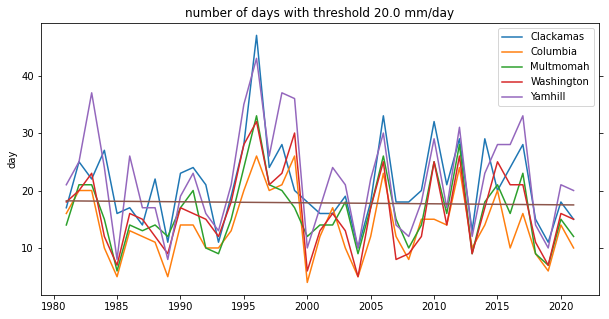

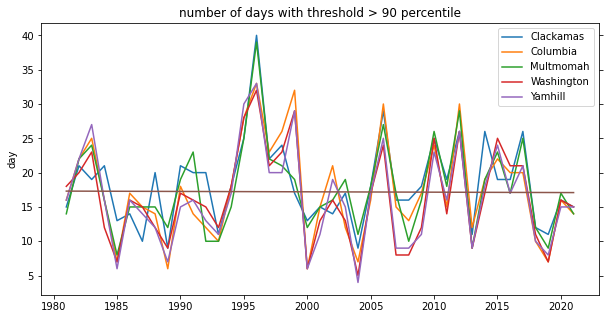

In [5]:
list_indices = ['R20mm', 'R90p']

t_prec = 20. ## mm
prec_p = quantile_prec(df_prec, 0.9)


# df_auantile is a pandas.core.series.Series
for ind in list_indices:
    indice, indice_out = ind_2_indice(ind)
    
    annual = create_2d(n_county)

    df_annual = []
    incr= date(year_s, 1, 1)
    end = date(year_e, 12, 31)
    while incr <= end:
        current_year = str(incr.year)
        for nc in np.arange(n_county):
            if ind == 'R20mm':
                annual[nc].append(indice(df_prec.iloc[:,nc+2][current_year].values, t_prec, 'True'))                    
            elif ind == 'R90p':
                annual[nc].append(indice(df_prec.iloc[:,nc+2][current_year].values, prec_p[nc], 'True'))
                
        incr = incr + relativedelta(years=1)
     
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    # use zip to aggregate elements from two or more iterables.
    # It generates a series of tuples containing elements from each iterable
    # df_annual = pd.DataFrame(list(zip(annual[0],annual[1],annual[2],annual[3],annual[4])),  columns = list_county)
    # np.float_(): convert items in a list to float
    df_annual = pd.DataFrame(np.transpose(np.float_(annual)), columns = list_county)
    df_annual.index = TIME

    ax.set_ylabel('day') #, fontsize=15, color='black', weight='semibold')
    if ind == 'R20mm':
        df_annual.plot(title=indice_out + str(t_prec) + " mm/day", ax=ax)
    elif ind == 'R90p':
        df_annual.plot(title=indice_out + '> 90 percentile', ax=ax)
    plot_trend(df_annual, ax);

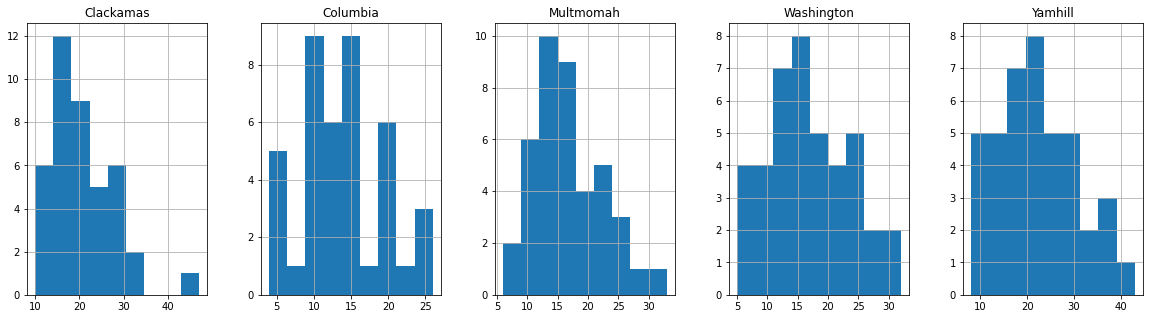

In [6]:
plot_hist(df_prec, 'R20mm', t_prec, 'True')

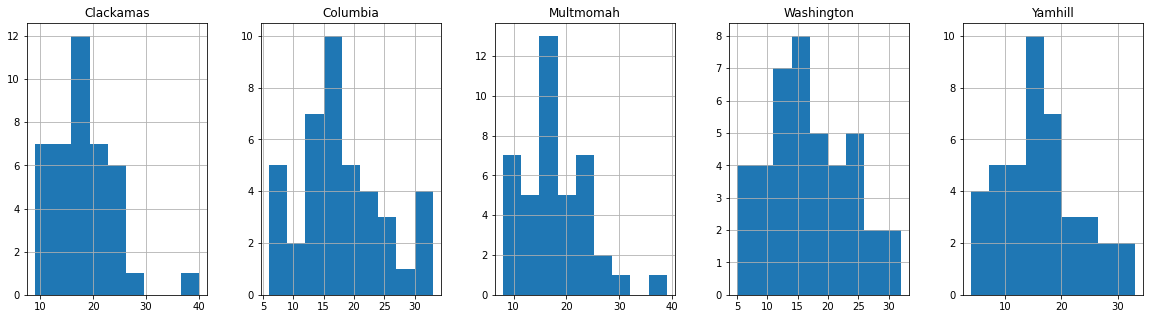

In [7]:
plot_hist(df_prec, 'R90p', prec_p90, 'True')

In [8]:
df_tmax = rd_csv('Tmax')
df_tmin = rd_csv('Tmin')
tmax_p10 = df_tmax.iloc[:,2:7].quantile(.1)
tmax_p90 = df_tmax.iloc[:,2:7].quantile(.9)
tmin_p10 = df_tmin.iloc[:,2:7].quantile(.1)
tmin_p90 = df_tmin.iloc[:,2:7].quantile(.9)
 
df_tmax.head()

read in  /glade/campaign/mmm/c3we/INNOVATOR/Tmax_1981-2021.csv
read in  /glade/campaign/mmm/c3we/INNOVATOR/Tmin_1981-2021.csv


,year,season,Clackamas,Columbia,Multmomah,Washington,Yamhill
datetime,,,,,,,
1981-01-01,1981,DJF,10.900493,11.845289,12.932822,12.309820,12.789285
1981-01-02,1981,DJF,10.196050,13.186927,13.670139,13.828677,13.638241
1981-01-03,1981,DJF,8.566392,13.053679,12.280520,12.507805,11.799164
1981-01-04,1981,DJF,7.765679,9.313214,10.311329,10.132181,9.900819
1981-01-05,1981,DJF,8.332645,11.361016,11.312885,11.230887,11.053707


In [9]:
# create a new DataFrame
ser = pd.Series(0, index = range(year_s, year_e+1))
data = {name_col[2]:ser, name_col[3]:ser, name_col[4]:ser, name_col[5]:ser, name_col[6]:ser}
df_year = pd.DataFrame(data) 
df_year.head()

,Clackamas,Columbia,Multmomah,Washington,Yamhill
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0
1985,0,0,0,0,0


#### The number of days Tmax > 90th percentile and number of days Tmax < 10st percentile

In [10]:
def plot_p90_p10(list_indices, df):
    list_county = ['Clackamas','Columbia', 'Multmomah', 'Washington','Yamhill']
    n_county = len(list_county)

    # calculate quantiles
    df_data = df.iloc[:,2:7]
    df_q90  = df_data.quantile(0.9)
    df_q10  = df_data.quantile(0.1) 
    
    TIME=[]
    year_e = 2021
    for y in range(year_s, year_e+1,1):
        TIME.append(y) 

    fig, ax = plt.subplots(1,2,figsize=(20,6))

    ct = 0
    for ind in list_indices:
        indice, indice_out = ind_2_indice(ind)
    
        annual = create_2d(n_county)

        df_annual = []
        incr= date(year_s, 1, 1)
        end = date(year_e, 12, 31)

        while incr <= end:
            current_year = str(incr.year)
            for nc in np.arange(n_county):
                if ct == 0:
                    annual[nc].append(indice(df.iloc[:,nc+2][current_year].values, df_q90[nc], 'True'))  
                elif ct == 1:
                    annual[nc].append(indice(df.iloc[:,nc+2][current_year].values, df_q10[nc], 'False')) 
                           
            incr = incr + relativedelta(years=1)
   
     
        # use zip to aggregate elements from two or more iterables.
        # It generates a series of tuples containing elements from each iterable
        # df_annual = pd.DataFrame(list(zip(annual[0],annual[1],annual[2],annual[3],annual[4])),  columns = list_county)
        # np.float_(): convert items in a list to float
        df_annual = pd.DataFrame(np.transpose(np.float_(annual)), columns = list_county)
   
        df_annual.index = TIME

        ax[ct].set_ylabel('day' ) #, fontsize=15, color='black', weight='semibold')
        if ct == 0:
            df_annual.plot(title=indice_out + " > 90 percentile", ax=ax[ct])
        elif ct == 1:
            df_annual.plot(title=indice_out + " < 10 percentile", ax=ax[ct])
        plot_trend(df_annual, ax[ct]);
        ct = ct + 1

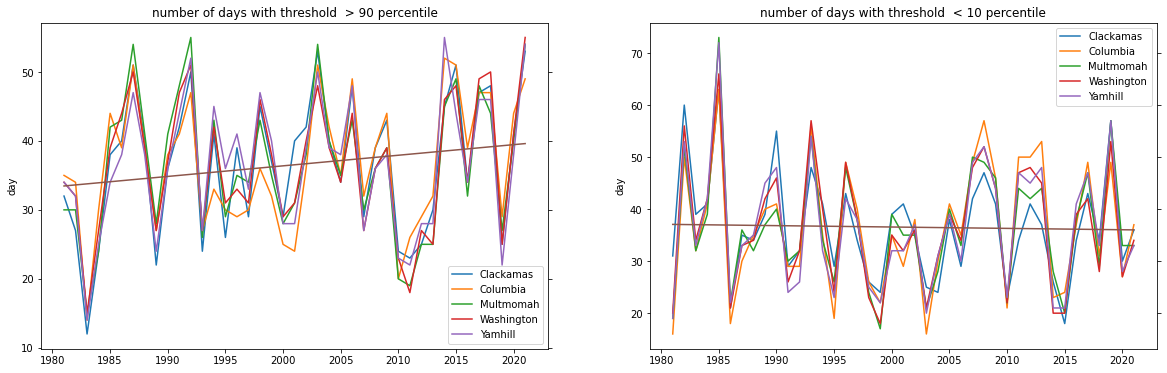

In [11]:
plot_p90_p10(['TX90p', 'TX10p'], df_tmax)

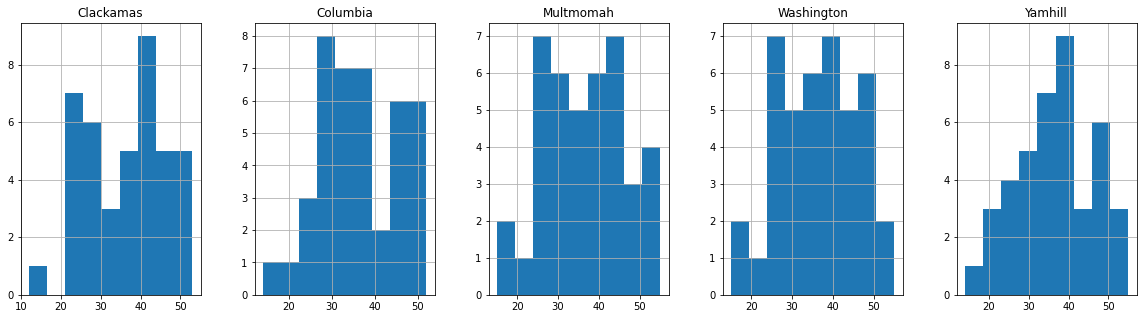

In [12]:
plot_hist(df_tmax, 'TX90p', tmax_p90, 'True');

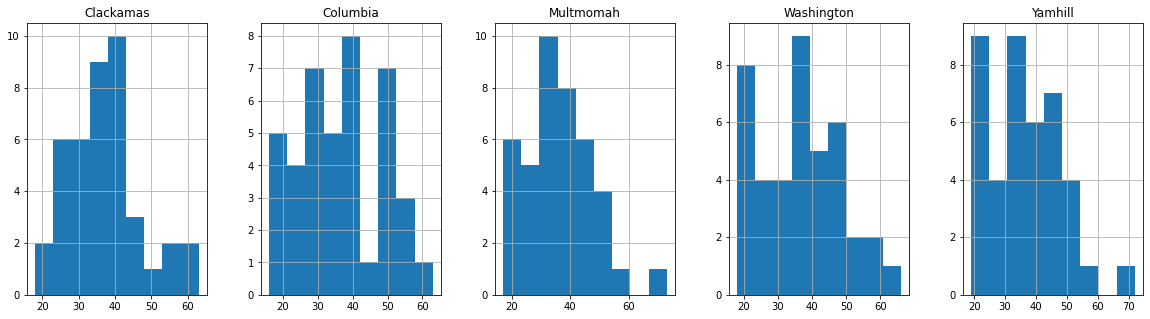

In [13]:
plot_hist(df_tmax, 'TX10p', tmax_p10, 'False');

#### The number of days Tmin > 90th percentile and number of days Tmin < 10st percentile

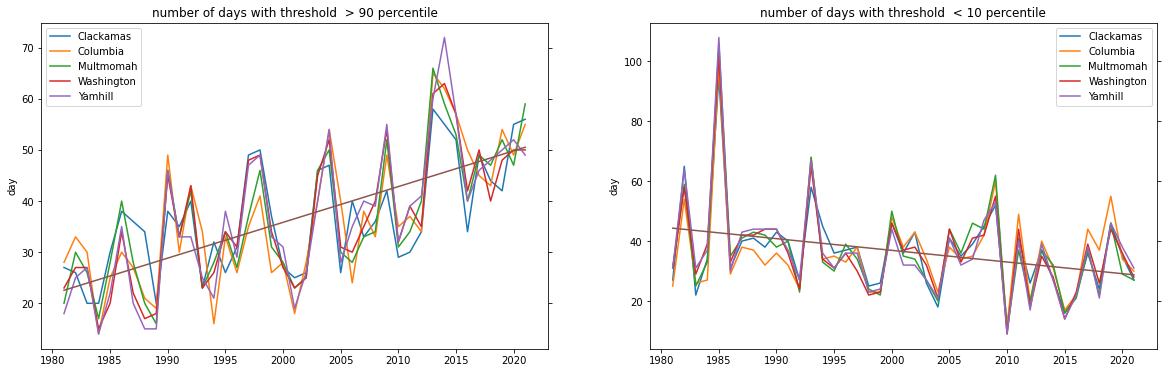

In [14]:
plot_p90_p10(['TN90p', 'TN10p'], df_tmin)

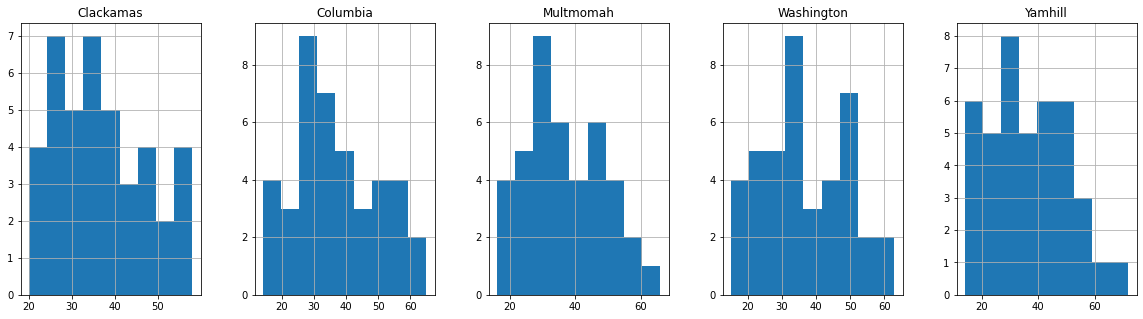

In [15]:
plot_hist(df_tmin, 'TN90p', tmin_p90, 'True')

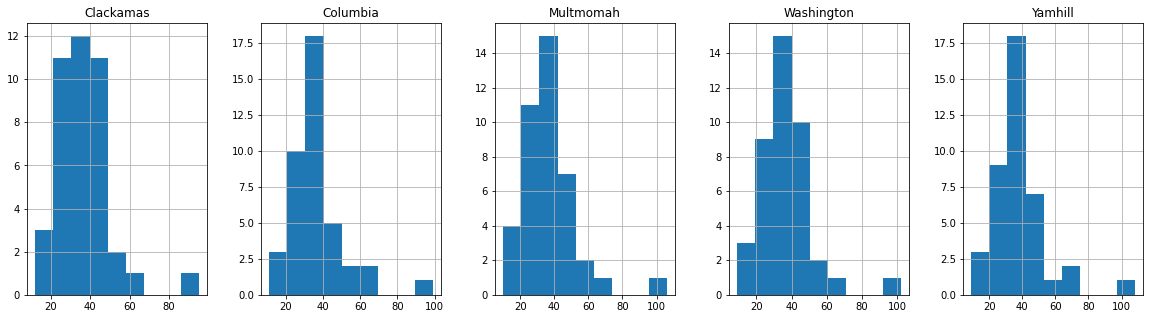

In [16]:
plot_hist(df_tmin, 'TN10p', tmin_p10, 'False')

#### SU: Number of Summer Days (Tmax > 30C)

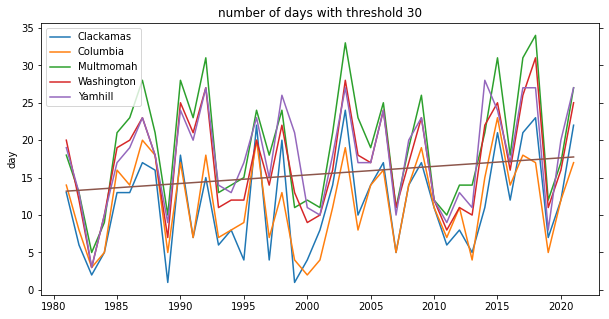

In [17]:
plot_threshold(df_tmax, 'SU', 30, 'True')

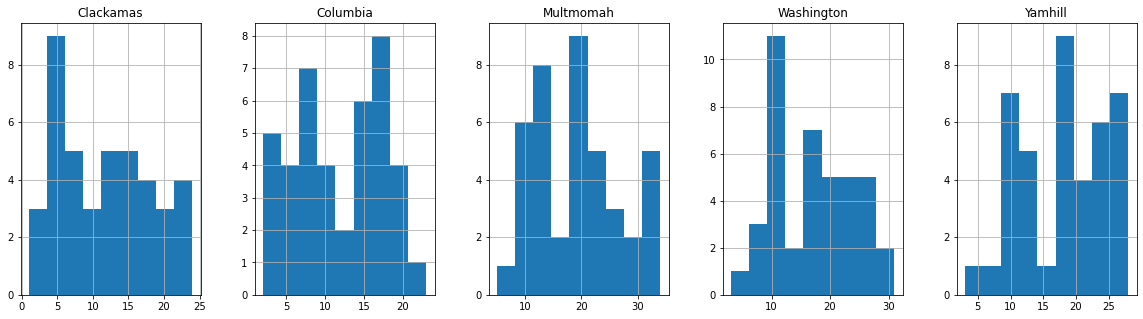

In [18]:
plot_hist(df_tmax, 'SU', 30, 'True') 

#### TR	Number of Tropical Nights (Tmin > 10C)

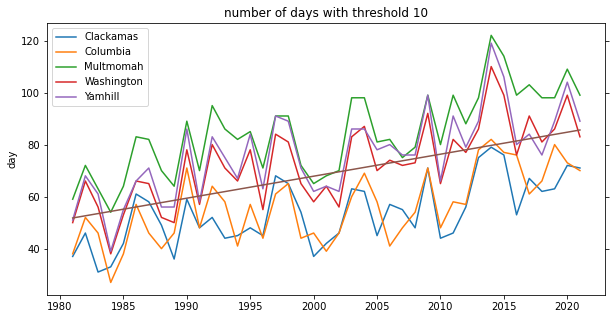

In [19]:
plot_threshold(df_tmin, 'TR', 10, 'True')

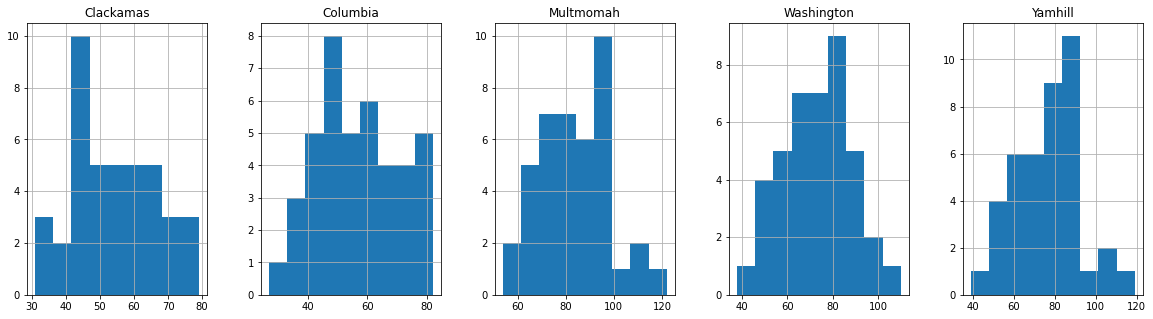

In [20]:
plot_hist(df_tmin, 'TR', 10, 'True')

#### FD	Number of Frost Days (Tmin < 0C)

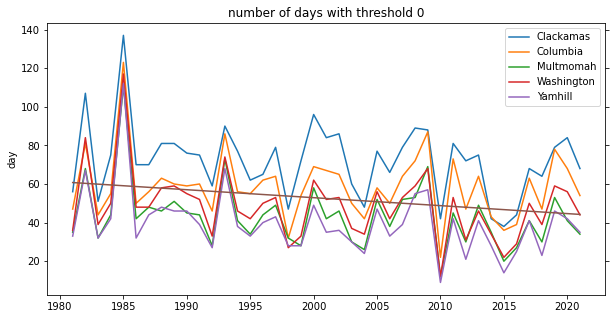

In [21]:
plot_threshold(df_tmin, 'FD', 0, 'False')

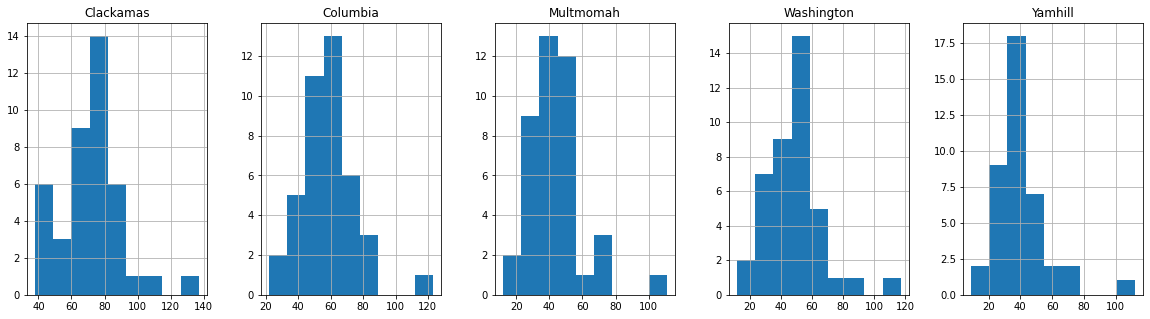

In [22]:
plot_hist(df_tmin, 'FD', 0, 'False')

#### ID	Number of sharp Ice Days (Tmax < 0C)

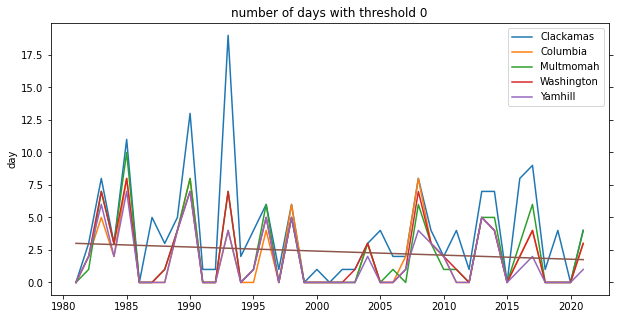

In [23]:
plot_threshold(df_tmax, 'ID', 0, 'False')

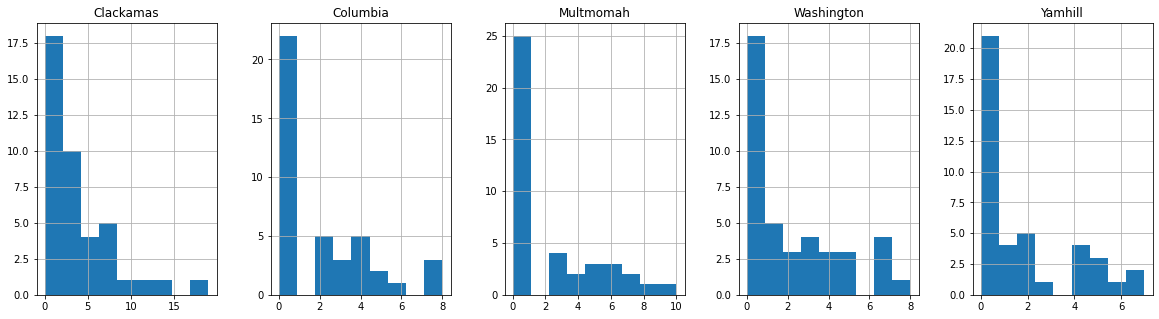

In [24]:
plot_hist(df_tmax, 'ID', 0, 'False')

#### CSU Maximum number of consecutive summer days (Tmax >30 C)

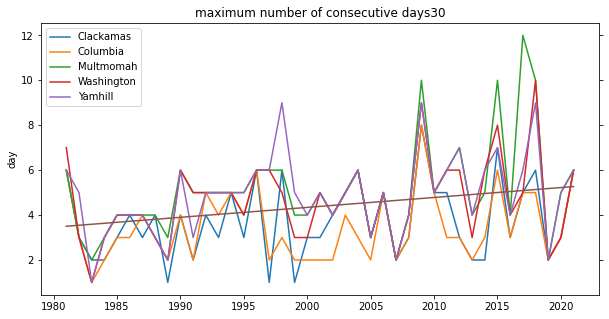

In [25]:
plot_threshold(df_tmax, 'CSU', 30, 'True') 

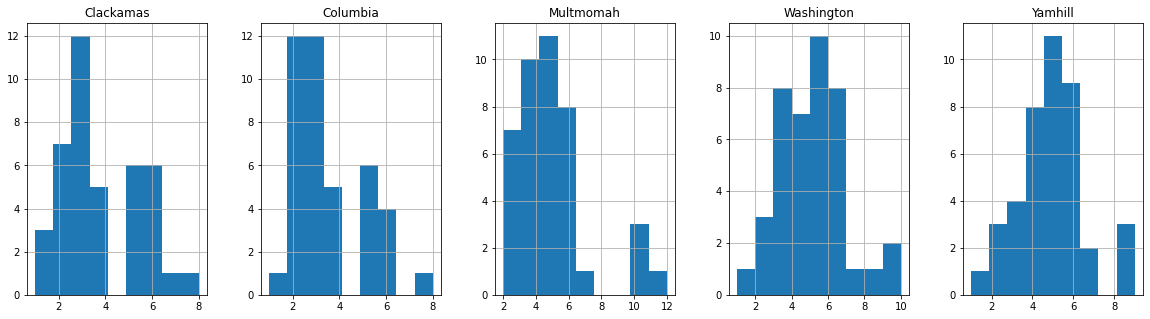

In [26]:
plot_hist(df_tmax, 'CSU', 30, 'True') 

#### CFD	Maximum number of consecutive frost days (Tmin < 0 C)

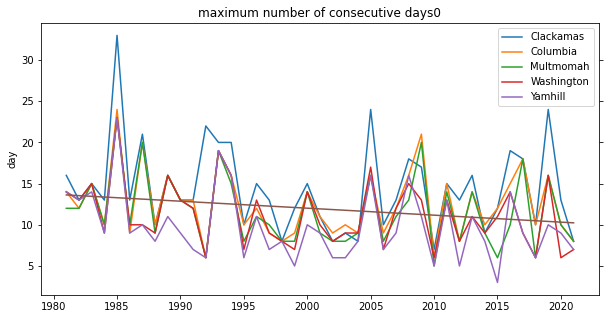

In [27]:
plot_threshold(df_tmin, 'CFD', 0, 'False') 

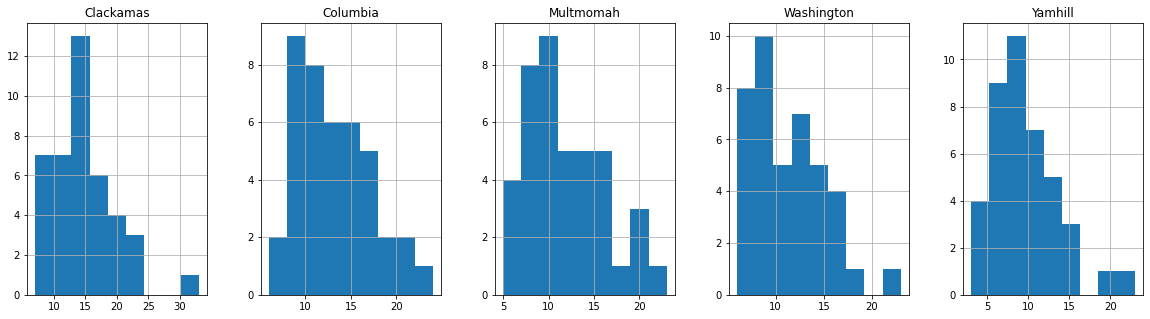

In [28]:
plot_hist(df_tmin, 'CFD', 0, 'False') 

#### •	4 compound indices (CD, CW, WD, WW)

In [29]:
# calculate average temperature from Tmax and Tmin tavg = 0.6*tmax + 0.4*tmin
df_tavg = df_tmax.copy()
df_tavg.iloc[:,2:7] = 0.6*df_tmax.iloc[:,2:7] + 0.4*df_tmin.iloc[:,2:7]
df_tavg

,year,season,Clackamas,Columbia,Multmomah,Washington,Yamhill
datetime,,,,,,,
1981-01-01,1981,DJF,7.956634,8.682049,9.339688,8.898990,9.421323
1981-01-02,1981,DJF,6.832637,8.640454,9.090023,9.033390,9.209996
1981-01-03,1981,DJF,6.047469,8.294161,8.499097,8.381188,8.270378
1981-01-04,1981,DJF,5.518678,6.019026,7.377020,7.005531,7.000022
1981-01-05,1981,DJF,5.703086,7.148028,7.521286,7.222225,7.343979
...,...,...,...,...,...,...,...
2021-12-27,2021,DJF,-3.287834,-1.216111,-0.753519,-1.312313,-1.140173
2021-12-28,2021,DJF,-4.412728,-3.668724,-2.852397,-2.943773,-1.947961
2021-12-29,2021,DJF,-1.660674,-0.705472,-0.742034,-0.563426,0.059517


#### compound indices (CD, CW, WD, WW) 

In [30]:
tg_p25 = df_tavg.iloc[:,2:7].quantile(.25) 
tg_p75 = df_tavg.iloc[:,2:7].quantile(.75)

In [32]:
df_p1 = df_prec.iloc[:,2:7]
df_p1 = df_p1[df_p1 >=1]
prec_p25 = df_p1.quantile(.25) 
prec_p75 = df_p1.quantile(.75) 

#### CD Days with T < 25th percentile of daily mean temperature and RR <25th percentile 

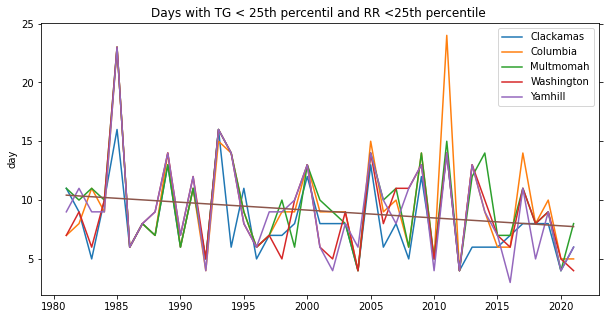

In [34]:
plot_comp_ind(df_prec, df_tavg, prec_p25, tg_p25,  'CD')

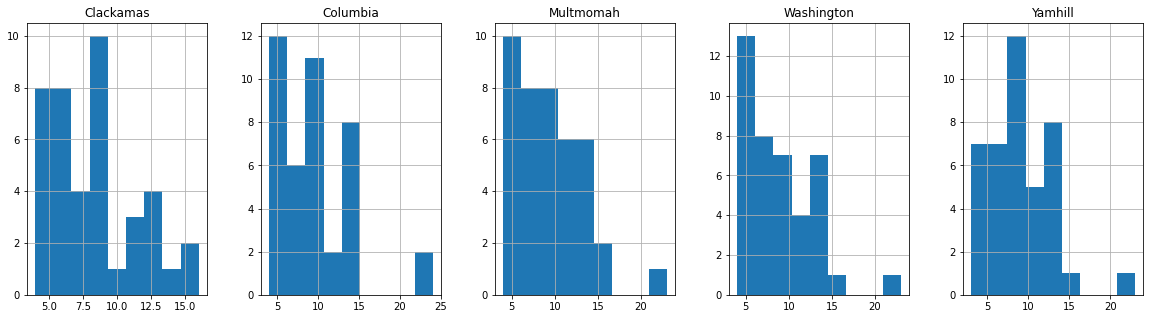

In [36]:
plot_hist_cd(df_prec, df_tavg, 'CD', prec_p25, tg_p25);

#### CW: Days with T < 25th percentile of daily mean temperature and RR > 75th percentile

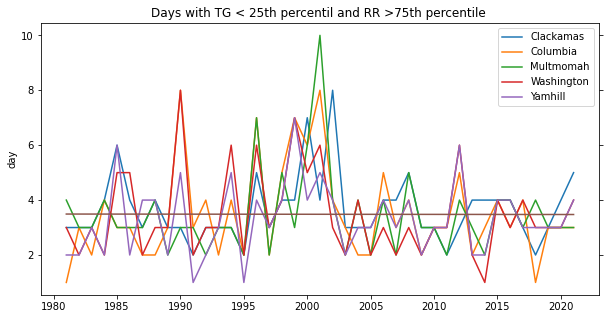

In [37]:
plot_comp_ind(df_prec, df_tavg, prec_p75, tg_p25,  'CW')

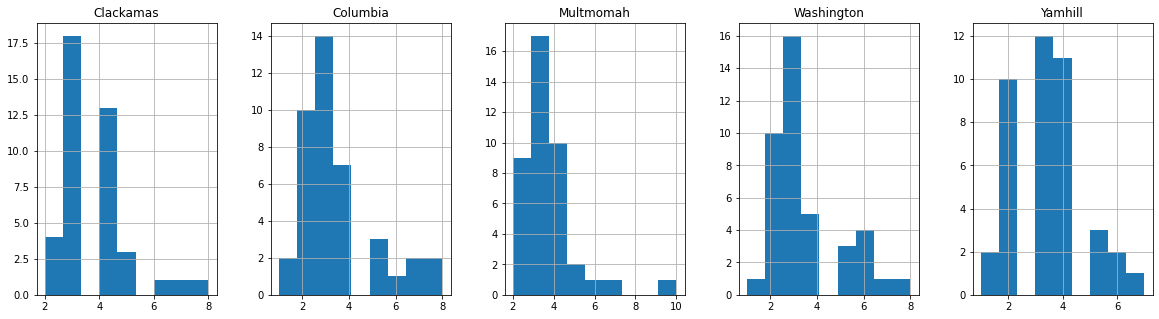

In [38]:
plot_hist_cd(df_prec, df_tavg, 'CW', prec_p75, tg_p25);

#### WD Days with T >75th percentile of daily mean temperature and RR <25th percentile

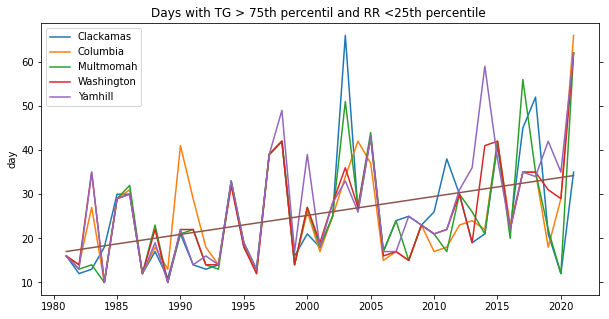

In [39]:
plot_comp_ind(df_prec, df_tavg, prec_p25, tg_p75,  'WD')

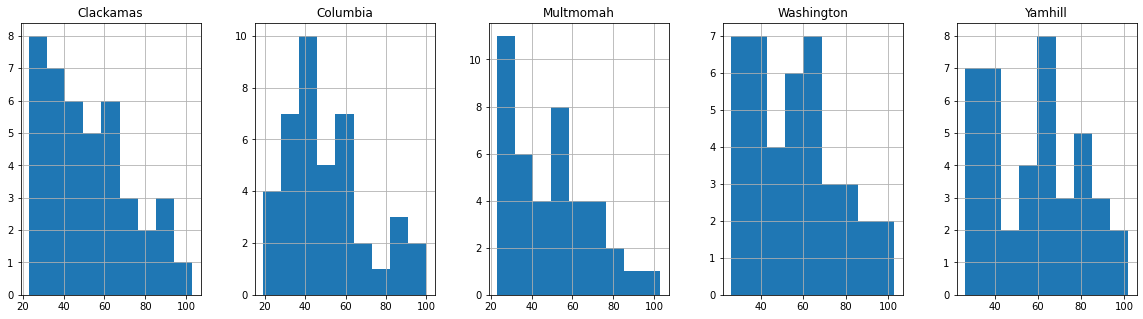

In [40]:
plot_hist_cd(df_prec, df_tavg, 'WD', prec_p25, tg_p25);

#### Days with T >75th percentile of daily mean temperature and RR > 75th percentile

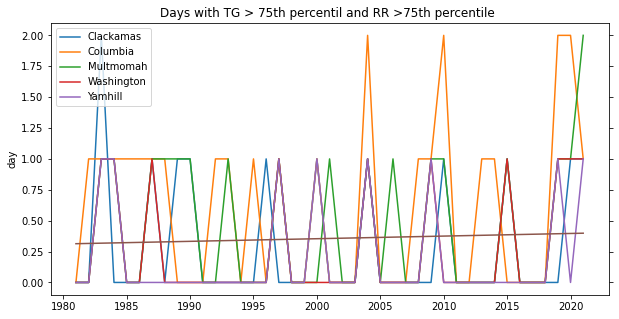

In [41]:
plot_comp_ind(df_prec, df_tavg, prec_p75, tg_p75,  'WW')

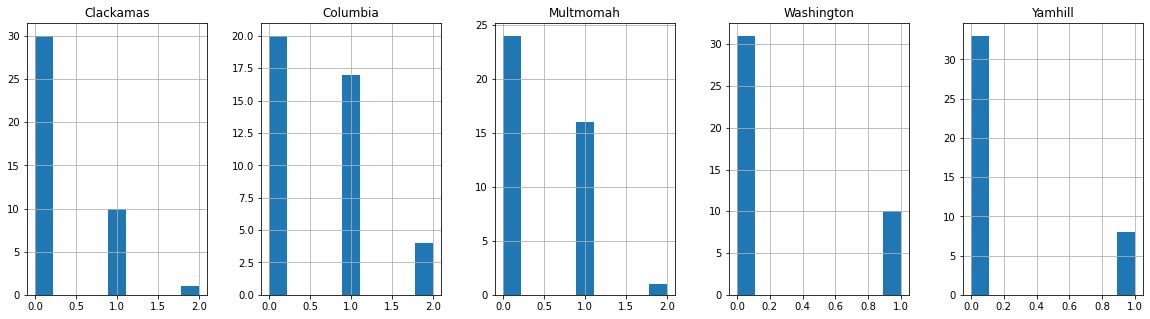

In [43]:
plot_hist_cd(df_prec, df_tavg, 'WW', prec_p75, tg_p75);